# Capstone Project: COVID-19 Hospital Length of Stay Predictor

## I. The Motivation

It goes without saying that the onset of the COVID-19 virus has had a drastic impact on the world as we know it today. At the beginning of the pandemic, hospitals were overrun with patients needing medical attention and it became clear that hospital infrastructure was not equipped for this unprecedented event.

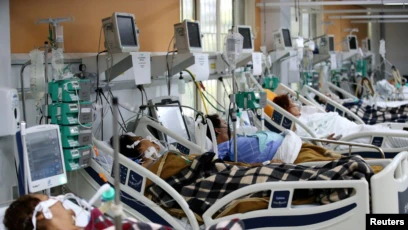

The motivation for this project came from a conversation I had with my roommate who is a nurse here in San Francisco who worked on a COVID unit during the pandemic. She told me that one of the biggest factors leading to inadequate care was the lack of hospital resources. Without proper resources, sick people were not able to receieve proper care. One of major contributing factors to this came from not knowing how long a patient would be hospitalized for when they are admitted. With such a huge influx of long-term residential patients, hospitals were quickly drained of resources such as PPE, certain medications, and even beds themselves. 

Predictive modeling has many applications in the healthcare field and I wanted to use this project as an opportunity to show how machine learning could be used to help alleviate the burden of this type of issue in the future. In this project, I build a classifier model that can be used to predict the length of stay (LOS) of a COVID-19 patient given certain predictive features. With further research and implementation, classifiers like these could be used in emergency situations to properly allocate resources based on predictive knowledge of how long a patient is expected to admitted for.

## II. Business Understanding

**Stakeholder**: Analytics team for a group of hospitals looking to predict length of stay (LOS) estimates for COVID-19 inpatients. 

**Problem**: Effectively predict the length of stay of a COVID-19 patient given similar past patient profiles in order to better allocate hospital resources and personnel. 

**Target**: Length of stay (LOS)
* Length of stay is defined as a categorical variable in this dataset broken into 10 day increments.
* In order to fit with my model, this was encoded using a LabelEncoder as follows:
    
| Label | # of Days |
| --- | --- |
| 0 | 0-10 Days |
| 1 | 11-20 Days |
| 2 | 21-30 Days |
| 3 | 31-40 Days |
| 4 | 41-50 Days |
| 5 | 51-60 Days |
| 6 | 61-70 Days |
| 7 | 71-80 Days |
| 8 | 81-90 Days |
| 9 | 91-100 Days |
| 10 | >100 Days |

* Upon further analysis of the data (discussed more in next section), I decided to group the labels into three categories: "Short-Term", "Medium-Term", and "Long-Term" by binning the data as follows: 

| Label | Type of Stay | # of Days |
| --- | --- | --- | 
| 0 | Short-Term | 0-20 Days |
| 1 | Medium-Term | 21-50 Days |
| 2 | Long-Term | > 51 Days |


My data came from a series of analytic healthcare data provided on Kaggle by Vidhya Healthcare Analytics to be used as a means of building and sharing predictive models for COVID-19 related projects.

The data was collected anonymously in order to protect the identity of the individuals and hospitals.

### Imports

In [38]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline 
sns.set(color_codes=True)

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier

## III. Data Exploration

### The Dataset

In [39]:
df_train = pd.read_csv('COVID-19_Train.csv')
df_train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [40]:
# Check shape --> there are 318,248 patient entries and 18 feature columns including my target 'Stay'

df_train.shape

(318438, 18)

In [41]:
# Get info --> quick summary of what I am working with 

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [42]:
# Get data types --> int, float, and objects 

df_train.dtypes

case_id                                int64
Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available Extra Rooms in Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                    float64
Stay                                  object
dtype: object

### Feature Analysis

Below is an overview of the features, a description, and important notes pertaining to how the data points were recorded in the dataset:

| Feature | Description | Notes |
| --- | --- | --- |
| case_ID | Case ID registered in Hospital | 
| Hospital_code | Unique code for the Hospital | Codes 1-30 for 30 Hospitals included in data |
| Hospital_type_code | Unique code for the type of Hospital | Codes a-g for 7 types of hospitals included (e.g. general, research, etc.) |
| City_Code_Hospital | City Code of the Hospital | Codes 1-13 for 13 cities included in data |
| Hospital_region_code | Region Code of the Hospital | Codes X, Y, Z for three regions included in data |
| Available Extra Rooms in Hospital | Number of extra rooms available in the Hospital | 
| Department | Department overlooking the case | 
| Ward_Type | Unique code for the Ward type | Unique code P-U for type of Ward |
| Ward_Facility_Code | Unique code for the Ward facility | Unique code A-F for Ward facility |
| Bed Grade | Condition of bed in the Ward | Scale grade 1-4 |
| patientid | Unique patient ID number | 
| City_Code_Patient | City code for the patient | Codes 1-38 for 38 cities included in data |
| Type of Admission | Admission type registered by the Hospital | Categorized as Trauma, Emergency, or Urgent |
| Severity of Illness | Severity of the illness recorded at the time of admission | Categorized as Minor, Moderate, or Extreme |
| Visitors with Patient | Number of visitors with the patient | 
| Age | Age of patient |
| Admission_Deposit | Deposit made at time of admission |

Since my model is intended to predict length of stay at time of admission in order to place a patient effectively, I am going to remove features that do not have predictive: 

* `case_ID`, `patientid` --> simply information about unique patient code 
* `Visitors with Patient` --> more visitors could mean longer stay but this is not predictive
* `Hospital_region_code` --> region is covered by City_Code_Hospital and provides more info

In [50]:
df_train = df_train.drop(['case_id', 'patientid', 'Hospital_region_code', 'Visitors with Patient'], axis=1)
df_train.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Age,Admission_Deposit,Stay
0,8,c,3,3,radiotherapy,R,F,2.0,7.0,Emergency,Extreme,51-60,4911.0,0
1,2,c,5,2,radiotherapy,S,F,2.0,7.0,Trauma,Extreme,51-60,5954.0,1
2,10,e,1,2,anesthesia,S,E,2.0,7.0,Trauma,Extreme,51-60,4745.0,1
3,26,b,2,2,radiotherapy,R,D,2.0,7.0,Trauma,Extreme,51-60,7272.0,1
4,26,b,2,2,radiotherapy,S,D,2.0,7.0,Trauma,Extreme,51-60,5558.0,1


In [43]:
# Summary statistics for the numerical variables 

df_train.describe()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,91925.276848,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


Some features seem to have some skew and the low minumum values should be checked as outliers. I will also check to see if there are any duplicates or missing values. 

### Data Cleaning: First Steps

In [44]:
# Check for duplicates 

df_train.duplicated().sum()

0

In [45]:
# Check missing values --> Bed Grade & City_Code_Patient 

df_train.isna().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [46]:
# Fill 'Bed Grade' and 'City_Code_Patient' missing values with mode due to outliers causing skew in data 

df_train['Bed Grade'].fillna(df_train['Bed Grade'].mode()[0], inplace=True)
df_train['City_Code_Patient'].fillna(df_train['City_Code_Patient'].mode()[0], inplace=True)

df_train.isna().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

### Data Cleaning: Target Analysis

Let's first take a look at the target variable 'Stay' in the data set to see the distribution of values:

21-30                 87491
11-20                 78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: Stay, dtype: int64

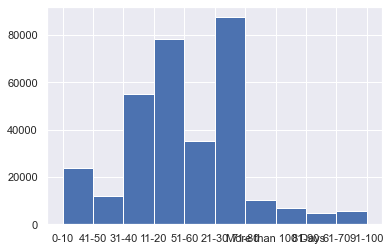

In [47]:
plt.hist(df_train['Stay'],)
df_train['Stay'].value_counts()

We can see that the vast majority of patients are hospitalized for less than 60 days. In the context of my problem, I want to help hospitals allocate resources and personnel effectively. In doing so, it may not be necessary to have 10 different prediction labels. 

I am going to bin the target label into three categories based on length of stay:

* **Short-Term**: less than 20 days
    * Quick turnaround for hospital 
    * Less personnel & resources 
    * Lower risk for long-term complications and/or death 

* **Medium-Term**: 21 to 60 days 
    * More intensive care
    * Moderate use of personnel & resources 
    * Increased risk for long-term complications and/or death

* **Long-Term**: more than 60 days 
    * Most intensive care 
    * Heavy use of personnel & resources 
    * Significant risk for long-term complications and/or death

In [48]:
df_train['Stay']= df_train['Stay'].replace({'0-10':0, '11-20':0, 
                                         '21-30':1, '31-40':1, '41-50':1, 
                                         '51-60':2,'61-70':2,'71-80':2,'81-90':2,'91-100':2,'More than 100 Days':2})

df_train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,1
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,1
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,1
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,1


Let's check out the new distributions:

1    154393
0    101743
2     62302
Name: Stay, dtype: int64

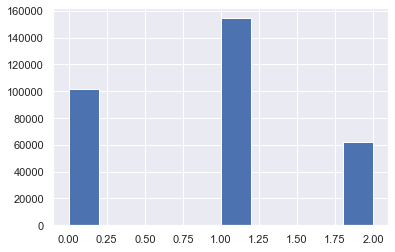

In [49]:
plt.hist(df_train['Stay'],)
df_train['Stay'].value_counts()

We can see with the new distributions that there is much less class imbalance which will allow my model to have an easier time predicting the minority classes. This works with the context of the problem as well since 10 day increments aren't necessarily the best for a length of stay analysis.

26    33076
23    26566
19    21219
6     20425
11    17328
14    17328
28    17137
27    14244
9     11510
29    11311
12    11297
32    10703
25     9834
10     9435
15     9257
21     8150
24     7992
3      7116
17     5501
5      5261
1      5249
13     5236
2      5102
30     5002
22     4277
31     3967
16     3671
8      3663
18     3630
20     1405
7      1306
4      1240
Name: Hospital_code, dtype: int64

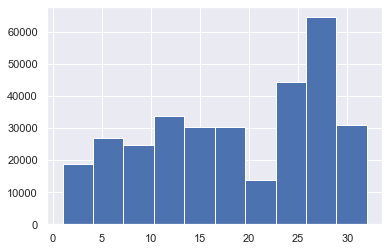

In [135]:
plt.hist(df_train['Hospital_code'])
df_train['Hospital_code'].value_counts()

a    143425
b     68946
c     45928
e     24770
d     20389
f     10703
g      4277
Name: Hospital_type_code, dtype: int64

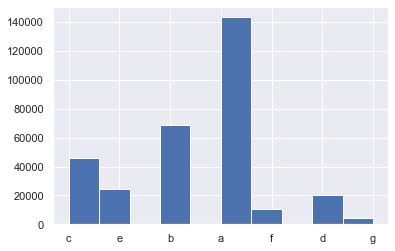

In [136]:
plt.hist(df_train['Hospital_type_code'])
df_train['Hospital_type_code'].value_counts()

1     55351
2     51809
6     46991
7     35463
3     31569
5     31105
9     26277
11    17137
4     13857
10     5249
13     3630
Name: City_Code_Hospital, dtype: int64

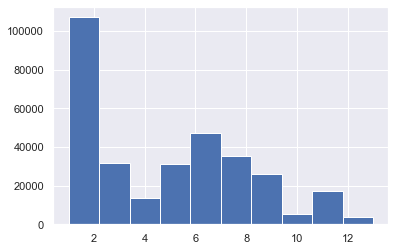

In [137]:
plt.hist(df_train['City_Code_Hospital'])
df_train['City_Code_Hospital'].value_counts()

X    133336
Y    122428
Z     62674
Name: Hospital_region_code, dtype: int64

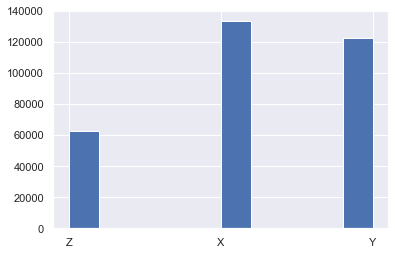

In [138]:
plt.hist(df_train['Hospital_region_code'])
df_train['Hospital_region_code'].value_counts()

2     98311
4     91709
3     91520
5     19288
6      7786
1      5582
7      2876
8      1027
9       218
10       67
11       17
0        15
12       13
21        3
13        2
20        2
14        1
24        1
Name: Available Extra Rooms in Hospital, dtype: int64

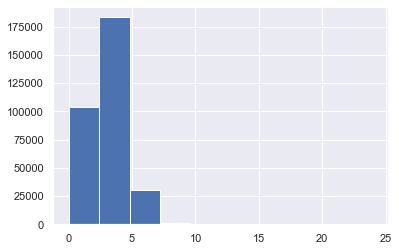

In [139]:
plt.hist(df_train['Available Extra Rooms in Hospital'])
df_train['Available Extra Rooms in Hospital'].value_counts()

gynecology            249486
anesthesia             29649
radiotherapy           28516
TB & Chest disease      9586
surgery                 1201
Name: Department, dtype: int64

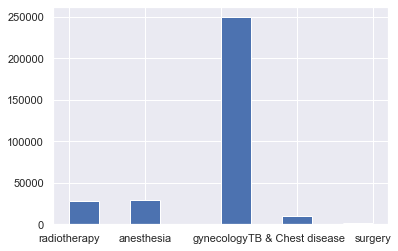

In [140]:
plt.hist(df_train['Department'])
df_train['Department'].value_counts()

R    127947
Q    106165
S     77794
P      5046
T      1477
U         9
Name: Ward_Type, dtype: int64

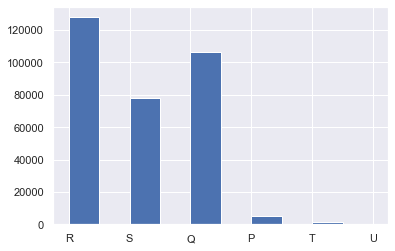

In [141]:
plt.hist(df_train['Ward_Type'])
df_train['Ward_Type'].value_counts()

F    112753
E     55351
D     51809
C     35463
B     35156
A     27906
Name: Ward_Facility_Code, dtype: int64

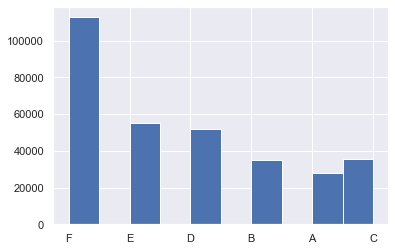

In [142]:
plt.hist(df_train['Ward_Facility_Code'])
df_train['Ward_Facility_Code'].value_counts()

2.0    123784
3.0    110583
4.0     57566
1.0     26505
Name: Bed Grade, dtype: int64

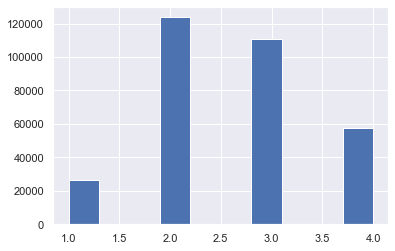

In [143]:
plt.hist(df_train['Bed Grade'])
df_train['Bed Grade'].value_counts()

8.0     128543
2.0      38869
1.0      26377
7.0      23807
5.0      20079
4.0      15380
9.0      11795
15.0      8950
10.0      8174
6.0       6005
12.0      5647
3.0       3772
23.0      3698
14.0      2927
16.0      2254
13.0      1625
21.0      1602
20.0      1409
18.0      1404
19.0      1028
26.0      1023
25.0       798
27.0       771
11.0       658
28.0       521
22.0       405
24.0       360
30.0       133
29.0        98
33.0        78
31.0        59
37.0        57
32.0        52
34.0        46
35.0        16
36.0        12
38.0         6
Name: City_Code_Patient, dtype: int64

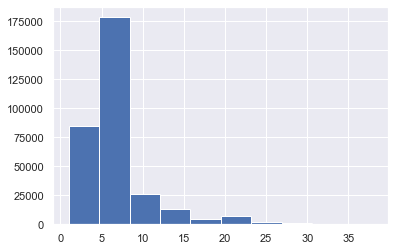

In [144]:
plt.hist(df_train['City_Code_Patient'])
df_train['City_Code_Patient'].value_counts()

Trauma       152261
Emergency    117676
Urgent        48501
Name: Type of Admission, dtype: int64

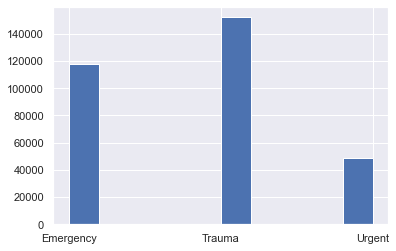

In [145]:
plt.hist(df_train['Type of Admission'])
df_train['Type of Admission'].value_counts()

Moderate    175843
Minor        85872
Extreme      56723
Name: Severity of Illness, dtype: int64

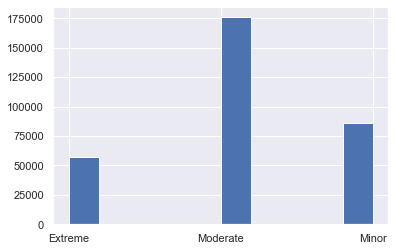

In [146]:
plt.hist(df_train['Severity of Illness'])
df_train['Severity of Illness'].value_counts()

2     138417
4      79225
3      59180
6      18860
5       9219
8       4872
7       2504
9       1358
1       1207
10      1183
12       968
11       327
16       286
14       207
15       194
13       106
24        78
20        62
18        61
0         22
17        20
22        19
19        12
25        12
21        11
23        10
30         9
32         9
Name: Visitors with Patient, dtype: int64

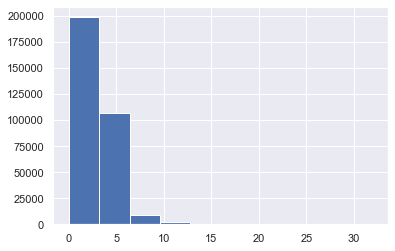

In [147]:
plt.hist(df_train['Visitors with Patient'])
df_train['Visitors with Patient'].value_counts()

41-50     63749
31-40     63639
51-60     48514
21-30     40843
71-80     35792
61-70     33687
11-20     16768
81-90      7890
0-10       6254
91-100     1302
Name: Age, dtype: int64

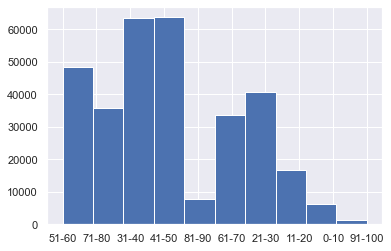

In [148]:
plt.hist(df_train['Age'])
df_train['Age'].value_counts()

4469.0    390
4277.0    377
4624.0    350
4789.0    302
4970.0    286
         ... 
9571.0      1
8724.0      1
1855.0      1
2109.0      1
7881.0      1
Name: Admission_Deposit, Length: 7300, dtype: int64

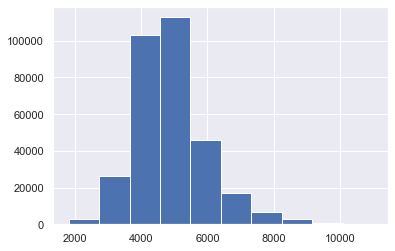

In [149]:
plt.hist(df_train['Admission_Deposit'])
df_train['Admission_Deposit'].value_counts()

In [52]:
# Split data into numerical and categorical categories 

num_data = df_train[['Hospital_code', 'City_Code_Hospital', 'Available Extra Rooms in Hospital', 'Bed Grade', 'City_Code_Patient', 'Admission_Deposit']]
cat_data = df_train[['Hospital_type_code', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age', 'Stay']]


### Exploratory Data Analysis (EDA)

Want to do more Visualizations once I complete the modeling steps. 

/Users/andrewmarinelli/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/andrewmarinelli/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/andrewmarinelli/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an 

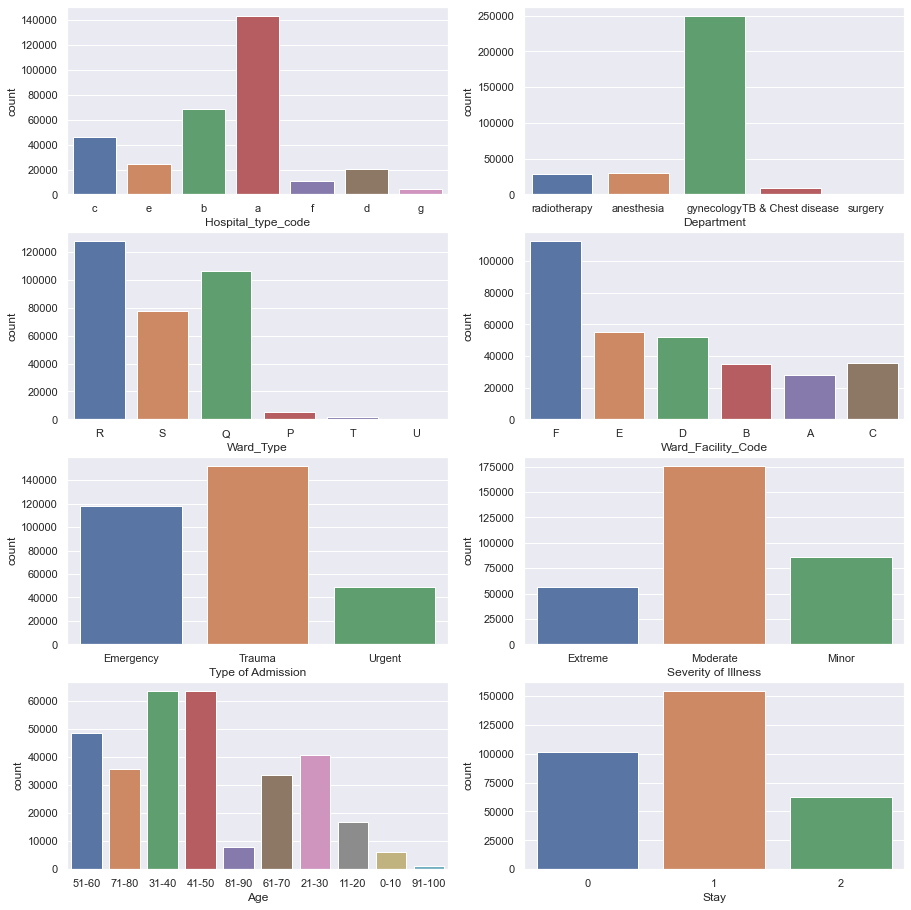

In [53]:
# Categorical data quick analysis 

i=1
plt.figure(figsize=(15,20))
for col in cat_data:
    plt.subplot(5,2,i)
    sns.countplot(df_train[col])
    i=i+1
plt.show()

/Users/andrewmarinelli/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/andrewmarinelli/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/andrewmarinelli/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt 

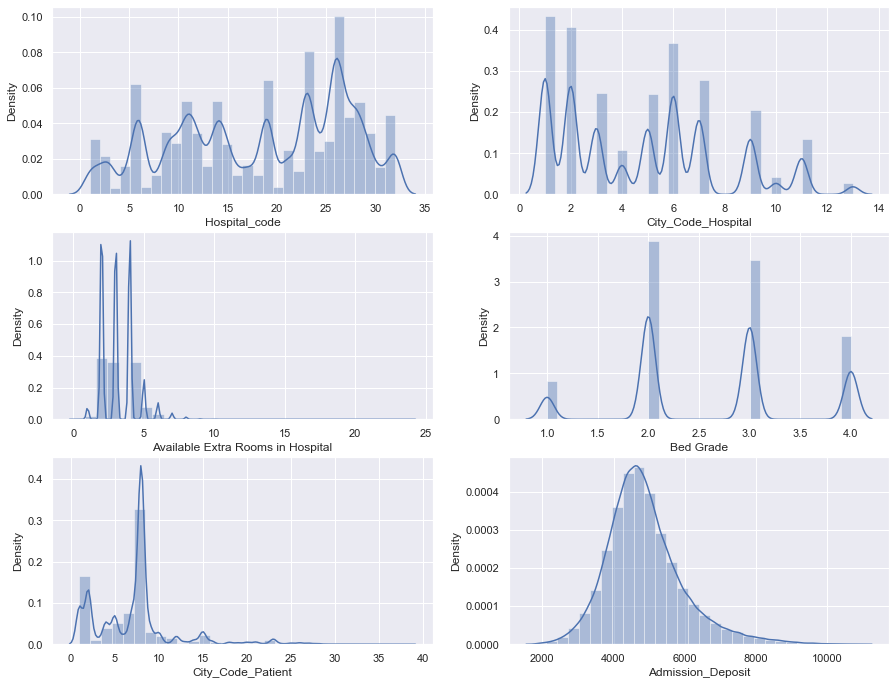

In [54]:
# Numerical data quick analysis 

i=1
plt.figure(figsize=(15,20))
for col in num_data:
    plt.subplot(5,2,i)
    sns.distplot(df_train[col], bins=30)
    i=i+1
plt.show()

# df.hist(bins=30, figsize=(15, 10))

### Label Encoding Categorical Data

In order to use the categorical variables in my model, I have implemented the LabelEn

In [16]:
labels = LabelEncoder()

for col in cat_data:
    df_train[col]= labels.fit_transform(df_train[col])

df_train.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,8,2,3,2,3,3,2,5,2.0,7.0,0,0,2,5,4911.0,0
1,2,2,5,2,2,3,3,5,2.0,7.0,1,0,2,5,5954.0,4
2,10,4,1,0,2,1,3,4,2.0,7.0,1,0,2,5,4745.0,3
3,26,1,2,1,2,3,2,3,2.0,7.0,1,0,2,5,7272.0,4
4,26,1,2,1,2,3,3,3,2.0,7.0,1,0,2,5,5558.0,4


<AxesSubplot:>

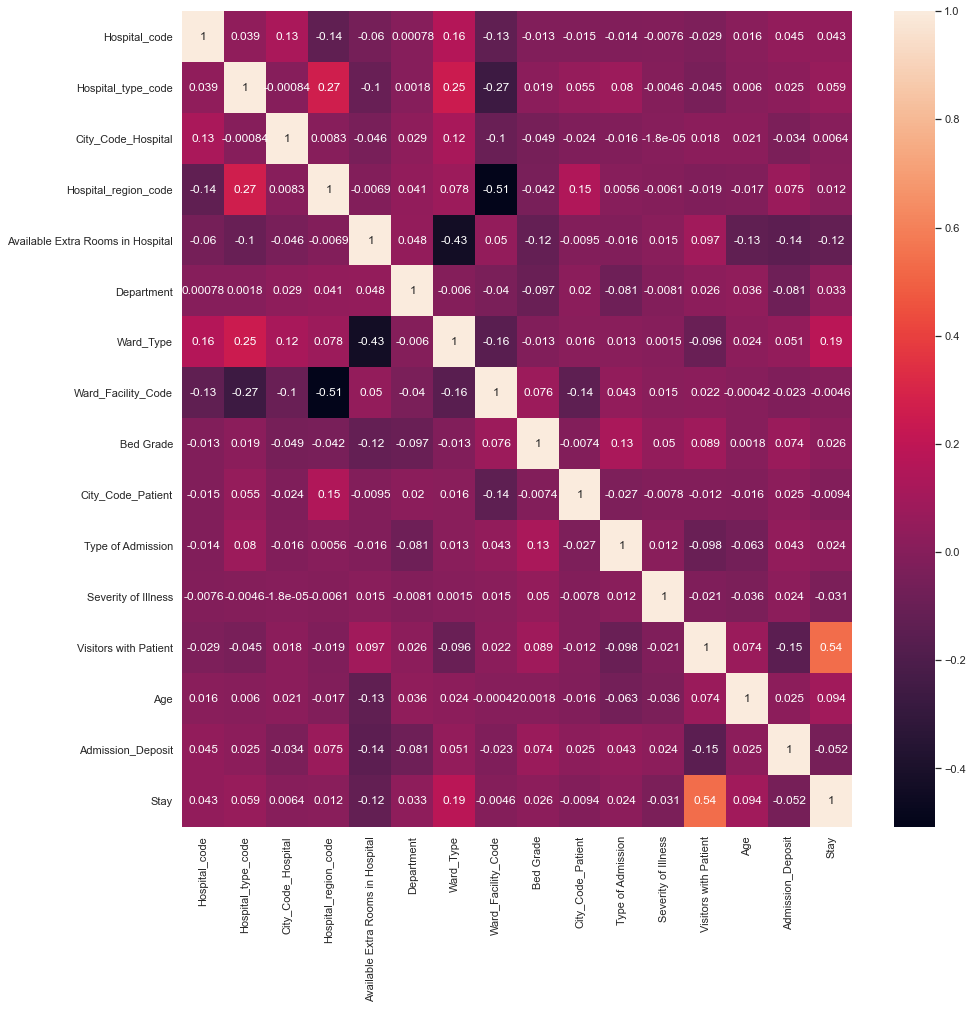

In [17]:
plt.figure(figsize=(15,15))
sns.heatmap(df_train.corr(), annot=True)

### Scaling Numerical Data 

In [18]:
scaler = StandardScaler()

for col in num_data:
    df_train[col]= scaler.fit_transform(df_train[col].values.reshape(-1,1))

df_train.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,-1.195176,2,-0.571055,2,-0.169177,3,2,5,-0.716535,-0.055708,0,0,-0.727923,5,0.027835,0
1,-1.890124,2,0.073580,2,-1.025217,3,3,5,-0.716535,-0.055708,1,0,-0.727923,5,0.987556,4
2,-0.963527,4,-1.215691,0,-1.025217,1,3,4,-0.716535,-0.055708,1,0,-0.727923,5,-0.124910,3
3,0.889668,1,-0.893373,1,-1.025217,3,2,3,-0.716535,-0.055708,1,0,-0.727923,5,2.200319,4
4,0.889668,1,-0.893373,1,-1.025217,3,3,3,-0.716535,-0.055708,1,0,-0.727923,5,0.623175,4


### Train-Test Split

In [42]:
y = df_train['Stay']
X = df_train.drop('Stay', axis=1)

#print(y)
#print(X)

In [43]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size= 0.2, stratify=y, random_state=42)

### Model 1: Decision Tree

In [44]:
dt_clf = DecisionTreeClassifier()
dt_model = dt_clf.fit(X_train, y_train)

dt_y_preds = dt_clf.predict(X_test)

In [45]:
# print(confusion_matrix(y_test, rf_y_preds))
print(classification_report(y_test, dt_y_preds))

accuracy = accuracy_score(y_test, dt_y_preds)
print(accuracy)

              precision    recall  f1-score   support

           0       0.19      0.19      0.19      4721
           1       0.35      0.34      0.35     15628
           2       0.38      0.38      0.38     17498
           3       0.24      0.24      0.24     11032
           4       0.06      0.06      0.06      2349
           5       0.30      0.30      0.30      7004
           6       0.02      0.02      0.02       549
           7       0.15      0.16      0.16      2051
           8       0.22      0.22      0.22       967
           9       0.09      0.10      0.10       553
          10       0.36      0.36      0.36      1336

    accuracy                           0.30     63688
   macro avg       0.21      0.22      0.22     63688
weighted avg       0.30      0.30      0.30     63688

0.2959741238537872


### Model 2: Random Forest

In [46]:
rf_clf = RandomForestClassifier()
rf_model = rf_clf.fit(X_train, y_train)

rf_y_preds = rf_clf.predict(X_test)

In [38]:
# print(confusion_matrix(y_test, rf_y_preds))
print(classification_report(y_test, rf_y_preds))

accuracy = accuracy_score(y_test, rf_y_preds)
print(accuracy)

              precision    recall  f1-score   support

           0       0.18      0.12      0.14      4721
           1       0.32      0.39      0.35     15628
           2       0.36      0.46      0.41     17498
           3       0.21      0.19      0.20     11032
           4       0.07      0.03      0.04      2349
           5       0.22      0.19      0.21      7004
           6       0.02      0.01      0.01       549
           7       0.11      0.05      0.07      2051
           8       0.11      0.04      0.06       967
           9       0.11      0.04      0.06       553
          10       0.21      0.11      0.14      1336

    accuracy                           0.29     63688
   macro avg       0.18      0.15      0.15     63688
weighted avg       0.27      0.29      0.27     63688

0.29237847004145207


### Model 3: KNeighbors 

In [40]:
knn_clf = KNeighborsClassifier()
knn_model = knn_clf.fit(X_train, y_train)

knn_y_preds = knn_clf.predict(X_test)

In [41]:
# print(confusion_matrix(y_test, rf_y_preds))
print(classification_report(y_test, knn_y_preds))

accuracy = accuracy_score(y_test, knn_y_preds)
print(accuracy)

              precision    recall  f1-score   support

           0       0.13      0.15      0.14      4721
           1       0.30      0.43      0.36     15628
           2       0.35      0.43      0.38     17498
           3       0.21      0.16      0.18     11032
           4       0.06      0.01      0.02      2349
           5       0.22      0.14      0.17      7004
           6       0.00      0.00      0.00       549
           7       0.08      0.02      0.03      2051
           8       0.09      0.02      0.03       967
           9       0.09      0.01      0.02       553
          10       0.20      0.07      0.10      1336

    accuracy                           0.28     63688
   macro avg       0.16      0.13      0.13     63688
weighted avg       0.25      0.28      0.26     63688

0.2796445170204748


### Model 4: XGBoost

In [27]:
xgb_clf = XGBClassifier()
xgb_model = xgb_clf.fit(X_train, y_train)

xgb_y_preds = xgb_clf.predict(X_test)

In [28]:
# print(confusion_matrix(y_test, rf_y_preds))
print(classification_report(y_test, xgb_y_preds))

accuracy = accuracy_score(y_test, xgb_y_preds)
print(accuracy)

              precision    recall  f1-score   support

           0       0.37      0.16      0.22      4721
           1       0.43      0.50      0.47     15628
           2       0.42      0.66      0.52     17498
           3       0.42      0.22      0.29     11032
           4       0.19      0.00      0.01      2349
           5       0.40      0.49      0.44      7004
           6       0.08      0.00      0.00       549
           7       0.38      0.04      0.07      2051
           8       0.37      0.23      0.28       967
           9       0.23      0.02      0.04       553
          10       0.55      0.42      0.48      1336

    accuracy                           0.42     63688
   macro avg       0.35      0.25      0.26     63688
weighted avg       0.41      0.42      0.39     63688

0.4232822509734958


In [29]:
# Feature importance function taken from class lecture 

def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

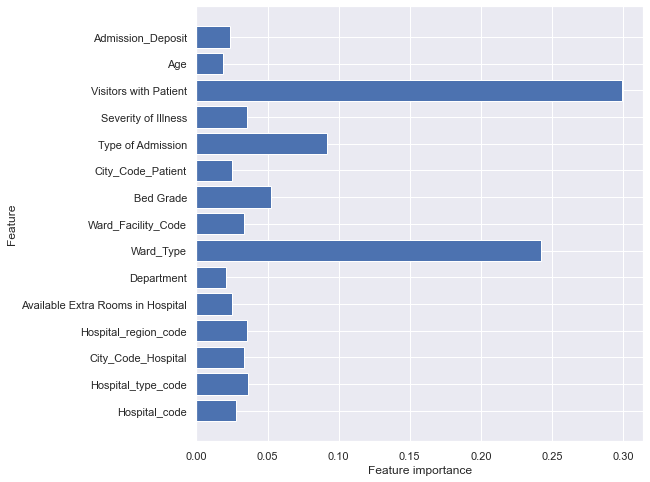

In [30]:
plot_feature_importances(xgb_clf)

This will be interesting to discuss in my findings and limitations. Also curious to mess around with removing visitors with patient. Will look into this more.

I also am interested in doing some feature engineering. 

### XGBoost Hyperparameter Tuning

In [51]:
param_grid = {
    'learning_rate': [0.02, 0.05, 0.1, 0.3],
    'max_depth': [5, 6, 7, 10],
    'min_child_weight': [1, 2, 5],
    'subsample': [0.2, 0.3, 0.4, 0.5],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0.5, 1, 1.5],
    'n_estimators': [100, 200, 500, 600],
}

grid_xgb = RandomizedSearchCV(xgb_clf, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_xgb.fit(X_train, y_train)

best_parameters = grid_xgb.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_xgb.predict(X_train)
test_preds = grid_xgb.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

KeyboardInterrupt: 

In [48]:
grid_xgb.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Final Model

In [53]:
xgb_clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)
xgb_model = xgb_clf.fit(X_train, y_train)

xgb_y_preds = xgb_clf.predict(X_test)

In [54]:
# print(confusion_matrix(y_test, rf_y_preds))
print(classification_report(y_test, xgb_y_preds))

accuracy = accuracy_score(y_test, xgb_y_preds)
print(accuracy)

              precision    recall  f1-score   support

           0       0.38      0.15      0.21      4721
           1       0.43      0.50      0.47     15628
           2       0.42      0.66      0.52     17498
           3       0.42      0.22      0.29     11032
           4       0.10      0.00      0.00      2349
           5       0.40      0.50      0.44      7004
           6       0.10      0.00      0.00       549
           7       0.39      0.03      0.06      2051
           8       0.35      0.22      0.27       967
           9       0.23      0.02      0.03       553
          10       0.54      0.41      0.47      1336

    accuracy                           0.42     63688
   macro avg       0.34      0.25      0.25     63688
weighted avg       0.40      0.42      0.39     63688

0.4227326968973747


/Users/andrewmarinelli/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

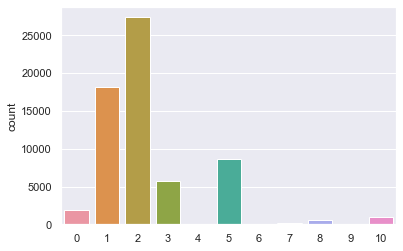

In [55]:
sns.countplot(xgb_y_preds)

In [66]:
(unique, counts) = np.unique(xgb_y_preds, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)

[[    0  1838]
 [    1 18204]
 [    2 27402]
 [    3  5681]
 [    4    30]
 [    5  8699]
 [    6    10]
 [    7   167]
 [    8   609]
 [    9    40]
 [   10  1008]]


In [151]:
y_test.value_counts().sort_values()

6       549
9       553
8       967
10     1336
7      2051
4      2349
0      4721
5      7004
3     11032
1     15628
2     17498
Name: Stay, dtype: int64

### Results

Need to continue working on hyperparameters since what I've had so far was taking too long. Will look into more fine-tuning here...But without hyperparamters a 42.3% accuracy score which is low but in the context of the problem can still have an impact. 

### Future Research